In [19]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import scipy.stats as st
import seaborn as sns

# Dallas

In [20]:
# import yelp city csv & read into dataframe
dallas_yelp_path = "./Output/Data/dallas_restaurants.csv"
dallas_yelp = pd.read_csv(dallas_yelp_path)
dallas_yelp

,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,Jia Modern Chinese & Asian Lounge,Dallas,32.864950,-96.804740,75225,chinese,$$,4.0
1,Szechuan Chinese Restaurant,Dallas,32.818150,-96.813430,75219,chinese,$,4.0
2,Sum Dang Good Chinese,Dallas,32.779323,-96.828615,75212,chinese,NaN,4.0
3,Hello Dumpling,Dallas,32.839650,-96.696860,75218,chinese,$$,4.5
4,Monkey King Noodle Company,Dallas,32.784737,-96.781062,75226,chinese,$$,3.5
...,...,...,...,...,...,...,...,...
1136,Taco Bell,Dallas,32.934204,-96.803799,75240,mexican,$,2.0
1137,Amigas Fast Food,Dallas,32.771835,-96.697858,75227,mexican,NaN,3.0
1138,CC Wing 'N' Taquria,Dallas,32.882860,-96.759070,75231,mexican,NaN,2.5
1139,Taco Bell,Dallas,32.909500,-96.856150,75229,mexican,$,1.5


In [21]:
# dallas_ethnicity_groups = dallas_yelp.groupby("ethnicity")
# dallas_ethnicity_groups.head()

In [22]:
dallas_ethnicity_sums = dallas_yelp["ethnicity"].value_counts()

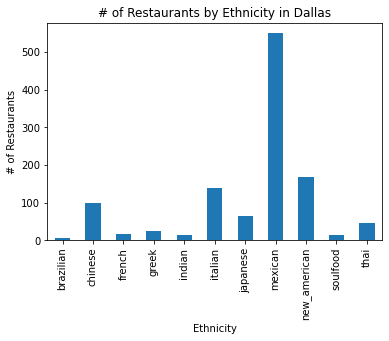

<Figure size 864x432 with 0 Axes>

In [23]:
ethnic_groups = dallas_yelp.groupby("ethnicity")
ethnic_counts = ethnic_groups['ethnicity'].count()
#colors=['crimson', 'red', 'orangered', 'darkorange', 'orange', 'gold', 'yellow', 'lime', 'cyan', 'dodgerblue', 'blue', 'darkviolet', 'purple']
dallas_ethnic_bar = ethnic_counts.plot(kind='bar')
dallas_ethnic_bar.set_title("# of Restaurants by Ethnicity in Dallas")
dallas_ethnic_bar.set_xlabel("Ethnicity")
dallas_ethnic_bar.set_ylabel("# of Restaurants")
# #plt.savefig("./Output/Data/DallasYelpBar.png")
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

In [24]:
price_groups = dallas_yelp["price"].value_counts()
price_groups

$$      441
$       377
$$$      44
$$$$      5
Name: price, dtype: int64

In [25]:
# price_counts = price_groups['price'].count()
# dallas_price_bar = price_counts.plot(kind='bar')
# dallas_price_bar.set_title("# of Restaurants by Price in Dallas")
# dallas_price_bar.set_xlabel("Price")
# dallas_price_bar.set_ylabel("# of Restaurants")
# # #plt.savefig("./Output/DallasYelpBar.png")
# plt.figure(figsize=(12,6))
# plt.tight_layout()
# plt.show()

In [26]:
# # set axis & tick locations
# x_axis = np.arange(len(dallas_yelp))
# #colors= ['crimson', 'red', 'orangered', 'darkorange', 'orange', 'gold', 'yellow', 'lime', 'cyan', 'dodgerblue', 'blue', 'darkviolet', 'purple']
# tick_locations = [value for value in x_axis]

# # create list indicating where to write x labels
# plt.figure(figsize=(12,6))
# plt.bar(x_axis, dallas_ethnicity_sums) #color=colors)
# plt.xticks(dallas_yelp["ethnicity"], rotation="vertical")
# plt.title("# of Ethnic Restaurants in Dallas")
# plt.xlabel("Ethnicity")
# plt.ylabel("Quantity")
# #plt.savefig("./Output/DallasYelpBar.png")
# plt.tight_layout()
# plt.show()

In [27]:
# create new filtered df to drop any restaurants that have no price grade listed
dallas_price_df = pd.DataFrame(dallas_yelp.dropna(subset=['price']))
dallas_price_df['price_int'] = [len(price) for price in dallas_price_df['price']]
dallas_price_df

,name,city,latitude,longitude,zipcode,ethnicity,price,rating,price_int
0,Jia Modern Chinese & Asian Lounge,Dallas,32.864950,-96.804740,75225,chinese,$$,4.0,2
1,Szechuan Chinese Restaurant,Dallas,32.818150,-96.813430,75219,chinese,$,4.0,1
3,Hello Dumpling,Dallas,32.839650,-96.696860,75218,chinese,$$,4.5,2
4,Monkey King Noodle Company,Dallas,32.784737,-96.781062,75226,chinese,$$,3.5,2
6,Royal China,Dallas,32.896104,-96.802183,75230,chinese,$$,3.5,2
...,...,...,...,...,...,...,...,...,...
1133,Taco Bell,Dallas,32.909420,-96.767920,75243,mexican,$,2.0,1
1134,La Chiquita Taqueria,Dallas,32.763750,-96.700980,75227,mexican,$,2.0,1
1136,Taco Bell,Dallas,32.934204,-96.803799,75240,mexican,$,2.0,1
1139,Taco Bell,Dallas,32.909500,-96.856150,75229,mexican,$,1.5,1


In [29]:
dallas_ethnic_price = dallas_price_df.groupby("ethnicity")["price"].value_counts()
dallas_ethnic_price

ethnicity     price
brazilian     $$         3
              $          2
              $$$        2
chinese       $         54
              $$        29
french        $$         5
              $$$        5
              $          1
              $$$$       1
greek         $$        19
              $          5
indian        $$         7
              $          2
italian       $$        69
              $         40
              $$$        9
japanese      $$        36
              $          9
              $$$        8
              $$$$       1
mexican       $        238
              $$       138
              $$$        2
              $$$$       1
new_american  $$       103
              $$$       18
              $         12
              $$$$       2
soulfood      $          6
              $$         2
thai          $$        30
              $          8
Name: price, dtype: int64

In [ ]:
dallas_price_df.groupby("ethnicity")["price_int"].value_counts().plot(kind='bar') 
plt.xlabel =("Ethnicity & Pricepoint")
plt.ylabel =("Count")
plt.title =("Breakdown of Restaurant Ethnicity by Pricepoint - Dallas")
#plt.savefig("./Output/Charts/Dallas_Ethnicity_Price_Bar.png")
plt.show()

In [28]:
dallas_rating_price = dallas_price_df.groupby("rating")["price"].value_counts()
dallas_rating_price

rating  price
1.0     $          4
1.5     $         15
        $$         2
2.0     $         27
        $$         4
2.5     $         45
        $$        21
3.0     $         61
        $$        53
        $$$        3
        $$$$       1
3.5     $$       104
        $         82
        $$$       13
        $$$$       2
4.0     $$       179
        $         86
        $$$       24
        $$$$       2
4.5     $$        72
        $         42
        $$$        4
5.0     $         15
        $$         6
Name: price, dtype: int64

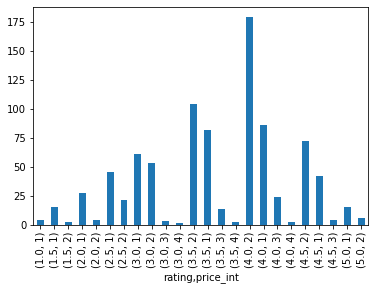

In [65]:
dallas_price_df.groupby("rating")["price_int"].value_counts().plot(kind='bar') 
plt.xlabel =("Rating & Pricepoint")
plt.ylabel =("Count")
plt.title =("Breakdown of Restaurant Rating by Pricepoint - Dallas")
#plt.savefig("./Output/Charts/Dallas_Rating_Price_Bar.png")
plt.show()

In [30]:
# dallas_price_bar = price_counts.plot(kind='bar')
# dallas_price_bar.set_title("# of Restaurants by Price in Dallas")
# dallas_price_bar.set_xlabel("Price")
# dallas_price_bar.set_ylabel("# of Restaurants")
# # #plt.savefig("./Output/DallasYelpBar.png")
# plt.figure(figsize=(12,6))
# plt.tight_layout()
# plt.show()

# Seattle

In [31]:
# import yelp city csv & read into dataframe
seattle_yelp_path = "./Output/Data/seattle_restaurants.csv"
seattle_yelp = pd.read_csv(seattle_yelp_path)
seattle_yelp.head()

,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,A + Hong Kong Kitchen,Seattle,47.598540,-122.326520,98104,chinese,$,4.0
1,Din Tai Fung,Seattle,47.612517,-122.335410,98101,chinese,$$,4.0
2,Harbor City Restaurant,Seattle,47.598210,-122.323390,98104,chinese,$$,4.0
3,Dough Zone,Seattle,47.597880,-122.327490,98104,chinese,$$,4.0
4,19 GOLD,Seattle,47.651839,-122.350314,98103,chinese,$$,4.5


In [32]:
seattle_ethnicity_sums = seattle_yelp["ethnicity"].value_counts()
seattle_ethnicity_sums

mexican         261
new_american    243
japanese        222
chinese         180
italian         160
thai            150
indian           57
greek            51
french           37
soulfood         12
brazilian         5
Name: ethnicity, dtype: int64

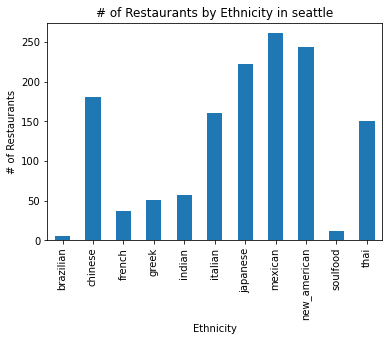

<Figure size 864x432 with 0 Axes>

In [33]:
ethnic_groups = seattle_yelp.groupby("ethnicity")
ethnic_counts = ethnic_groups['ethnicity'].count()
seattle_ethnic_bar = ethnic_counts.plot(kind='bar')
seattle_ethnic_bar.set_title("# of Restaurants by Ethnicity in seattle")
seattle_ethnic_bar.set_xlabel("Ethnicity")
seattle_ethnic_bar.set_ylabel("# of Restaurants")
# #plt.savefig("./Output/Charts/Seattle_Ethnic_Bar.png")
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

In [34]:
seattle_price_df = pd.DataFrame(seattle_yelp.dropna(subset=['price']))
seattle_price_df['price_int'] = [len(price) for price in seattle_price_df['price']]
seattle_price_df

,name,city,latitude,longitude,zipcode,ethnicity,price,rating,price_int
0,A + Hong Kong Kitchen,Seattle,47.598540,-122.326520,98104,chinese,$,4.0,1
1,Din Tai Fung,Seattle,47.612517,-122.335410,98101,chinese,$$,4.0,2
2,Harbor City Restaurant,Seattle,47.598210,-122.323390,98104,chinese,$$,4.0,2
3,Dough Zone,Seattle,47.597880,-122.327490,98104,chinese,$$,4.0,2
4,19 GOLD,Seattle,47.651839,-122.350314,98103,chinese,$$,4.5,2
...,...,...,...,...,...,...,...,...,...
1373,Taco Time,Seattle,47.711987,-122.186876,98034,mexican,$,3.5,1
1374,Jack in the Box,Seattle,47.720318,-122.345448,98133,mexican,$,2.0,1
1375,Chipotle Mexican Grill,Seattle,47.560212,-122.386614,98116,mexican,$,2.5,1
1376,Taco Del Mar,Seattle,47.616689,-122.204980,98004,mexican,$,3.0,1


In [35]:
seattle_ethnic_price = seattle_price_df.groupby("ethnicity")["price"].value_counts()
seattle_ethnic_price

ethnicity     price
brazilian     $$$        3
chinese       $$        97
              $         48
              $$$        2
french        $$        16
              $$$       15
              $          1
              $$$$       1
greek         $         23
              $$        22
              $$$        1
indian        $$        30
              $          8
italian       $$       115
              $$$       17
              $          5
              $$$$       2
japanese      $$       111
              $         66
              $$$       10
              $$$$       3
mexican       $        120
              $$        96
new_american  $$       159
              $$$       35
              $         18
              $$$$       7
soulfood      $$         6
              $          2
thai          $$       103
              $         25
Name: price, dtype: int64

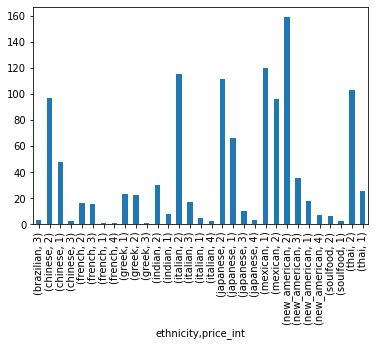

In [63]:
seattle_ethnic_price = seattle_price_df.groupby("ethnicity")["price_int"].value_counts().plot(kind='bar') 
seattle_ethnic_price.set_xlabel = ("Ethnicity & Pricepoint")
seattle_ethnic_price.set_ylabel = ("Count")
seattle_ethnic_price.set_title = ("Breakdown of Restaurant Ethnicity by Pricepoint - Seattle")
#plt.savefig("./Output/Charts/Seattle_Ethnic_Price_Bar.png")
plt.show()

In [36]:
seattle_rating_price = seattle_price_df.groupby("rating")["price"].value_counts()
seattle_rating_price

rating  price
1.0     $          1
1.5     $          3
2.0     $          8
        $$         1
2.5     $         24
        $$        11
        $$$        2
3.0     $$        77
        $         48
3.5     $$       218
        $         88
        $$$       15
        $$$$       1
4.0     $$       337
        $         92
        $$$       49
        $$$$       6
4.5     $$       108
        $         47
        $$$       16
        $$$$       5
5.0     $          5
        $$         3
        $$$        1
        $$$$       1
Name: price, dtype: int64

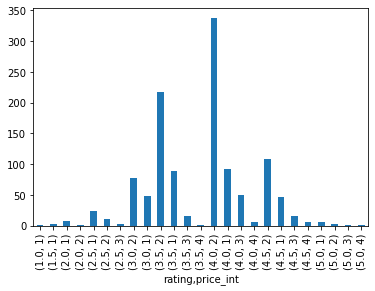

In [64]:
seattle_price_df.groupby("rating")["price_int"].value_counts().plot(kind='bar') 
plt.xlabel =("Rating & Pricepoint")
plt.ylabel =("Count")
plt.title =("Breakdown of Restaurant Rating by Pricepoint - Seattle")
#plt.savefig("./Output/Charts/Seattle_Rating_Price_Bar.png")
plt.show()

# Indianapolis

In [38]:
indianapolis_yelp_path = "./Output/Data/indianapolis_restaurants.csv"
indianapolis_yelp = pd.read_csv(indianapolis_yelp_path)
indianapolis_yelp.head()

,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,Asian Snack,indianapolis,39.820046,-86.228305,46222,chinese,$,4.5
1,Hong Kong China Restaurant,indianapolis,39.787680,-86.159940,46202,chinese,$,3.5
2,General Tso Inn,indianapolis,39.758240,-86.114960,46203,chinese,$,4.0
3,Fei Da,indianapolis,39.788189,-86.208588,46222,chinese,$,4.0
4,Asian Harbor,indianapolis,39.774140,-86.161667,46204,chinese,$$,3.5


In [39]:
indianapolis_ethnicity_sums = indianapolis_yelp["ethnicity"].value_counts()
indianapolis_ethnicity_sums

mexican         224
new_american     68
chinese          65
italian          58
indian           18
soulfood         18
japanese         16
thai             14
greek            12
french            9
brazilian         5
Name: ethnicity, dtype: int64

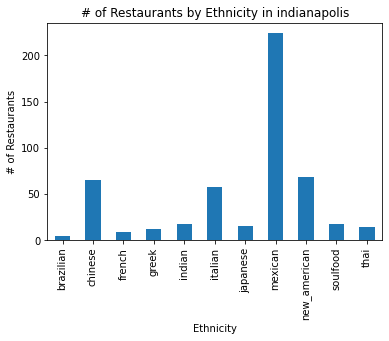

<Figure size 864x432 with 0 Axes>

In [40]:
indy_ethnic_groups = indianapolis_yelp.groupby("ethnicity")
indy_ethnic_counts = indy_ethnic_groups['ethnicity'].count()
indianapolis_ethnic_bar = indy_ethnic_counts.plot(kind='bar')
indianapolis_ethnic_bar.set_title("# of Restaurants by Ethnicity in indianapolis")
indianapolis_ethnic_bar.set_xlabel("Ethnicity")
indianapolis_ethnic_bar.set_ylabel("# of Restaurants")
# #plt.savefig("./Output/indianapolisYelpBar.png")
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

In [41]:
indy_price_df = pd.DataFrame(indianapolis_yelp.dropna(subset=['price']))
indy_price_df['price_int'] = [len(price) for price in indy_price_df['price']]
indy_price_df

,name,city,latitude,longitude,zipcode,ethnicity,price,rating,price_int
0,Asian Snack,indianapolis,39.820046,-86.228305,46222,chinese,$,4.5,1
1,Hong Kong China Restaurant,indianapolis,39.787680,-86.159940,46202,chinese,$,3.5,1
2,General Tso Inn,indianapolis,39.758240,-86.114960,46203,chinese,$,4.0,1
3,Fei Da,indianapolis,39.788189,-86.208588,46222,chinese,$,4.0,1
4,Asian Harbor,indianapolis,39.774140,-86.161667,46204,chinese,$$,3.5,2
...,...,...,...,...,...,...,...,...,...
501,Taco Bell,indianapolis,39.854890,-86.240240,46254,mexican,$,1.5,1
502,Taco Bell,indianapolis,39.905167,-86.059453,46250,mexican,$,2.0,1
503,Chipotle Mexican Grill,indianapolis,39.905766,-86.077454,46250,mexican,$,2.5,1
504,Taco Bell,indianapolis,39.709099,-86.082211,46203,mexican,$,2.0,1


In [42]:
indy_ethnic_price = indy_price_df.groupby("ethnicity")["price"].value_counts()
indy_ethnic_price

ethnicity     price
brazilian     $          1
              $$$        1
chinese       $         47
              $$        11
french        $$         3
              $$$        3
greek         $          5
              $$         4
indian        $$         7
              $          4
italian       $         25
              $$        23
              $$$        2
              $$$$       1
japanese      $$        12
              $          1
mexican       $        108
              $$        44
new_american  $$        44
              $          8
              $$$        4
              $$$$       1
soulfood      $$         7
              $          1
thai          $$        10
              $          3
Name: price, dtype: int64

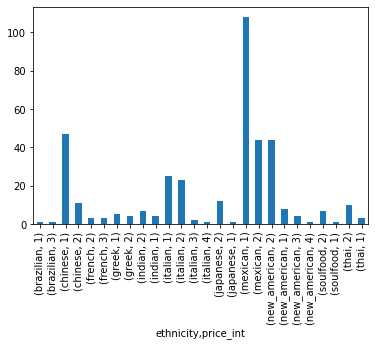

In [60]:
indy_price_df.groupby("ethnicity")["price_int"].value_counts().plot(kind='bar') 
plt.xlabel =("Ethnicity & Pricepoint")
plt.ylabel =("Count")
plt.title =("Breakdown of Restaurant Ethnicity by Pricepoint - Indianapolis")
#plt.savefig("./Output/Charts/Indianapolis_Ethnic_Price_Bar.png")
plt.show()

In [43]:
indy_rating_price = indy_price_df.groupby("rating")["price"].value_counts()
indy_rating_price

rating  price
1.0     $         3
1.5     $        19
        $$$$      2
2.0     $        14
2.5     $        20
        $$        2
3.0     $        23
        $$       13
3.5     $$       35
        $        30
4.0     $$       81
        $        57
        $$$       7
4.5     $        34
        $$       34
        $$$       3
5.0     $         3
Name: price, dtype: int64

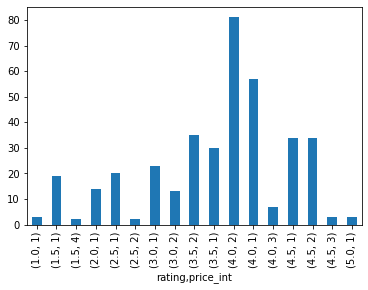

In [61]:
indy_price_df.groupby("rating")["price_int"].value_counts().plot(kind='bar') 
plt.xlabel =("Rating & Pricepoint")
plt.ylabel =("Count")
plt.title =("Breakdown of Restaurant Ethnicity by Pricepoint - Indianapolis")
#plt.savefig("./Output/Charts/Indianapolis_Ethnic_Price_Bar.png")
plt.show()

In [44]:
# ethnicity vs. # of restaurants bar
# price vs. ethnicity bar
# price vs. rating
# heat map using price

